## 2.1.1

In [1]:
import math

def tripla_pitagorica(n):

    for x2 in range(n):
        
        for x1 in range(1, x2):
            
            x3 = math.sqrt( x1 * x1 + x2 * x2)
            if x3 % 1 == 0 and x1 + x2 + x3 == n:
                return x1, x2, int(x3)
            
x1, x2, x3 = tripla_pitagorica(1000)

print("2.1.1 ---> x1 =", x1, "x2 =", x2, "x3 =",x3)

2.1.1 ---> x1 = 200 x2 = 375 x3 = 425


## 2.1.2

In [2]:
if  ( (x1 * x2) % 12) == 0:
    print("2.1.2 ---> x1*x2 é divisível por 12")

2.1.2 ---> x1*x2 é divisível por 12


## 2.2.1

In [3]:
def sequencia_fibonnaci(digitos):
    DIGITOS = digitos
    numAnt = 1
    numAct = 0
    i = 0
    while(True):
        
        if len(str(numAct)) > DIGITOS:
            return -1
        elif len(str(numAct)) == DIGITOS:
            return str(i)
        
        numAnt, numAct = numAct, numAnt + numAct
        i += 1

digits = 1000

index = sequencia_fibonnaci(digits)
        
print("2.2.1 ---> O índice do primeiro elemento de Fibonacci com", digits, "dígitos é:",index)

2.2.1 ---> O índice do primeiro elemento de Fibonacci com 1000 dígitos é: 4782


## 2.2.2

In [4]:
def contar_numeros_impares_com_N_digitosWith(digitos):
    
    menor = 10**(digitos-1)
    maior = 10**(digitos)-1
    numerosImpares = int((maior - menor + 1)/2)
        
    return numerosImpares
 
digitos = 9
oddNumbers = contar_numeros_impares_com_N_digitosWith(digitos)

print("2.2.2 --->",oddNumbers,"números de", digitos, "dígitos possuem soma ímpar de seus dígitos, visto que metade dos números será par e a outra ímpar, o que significa que a soma dos seus elementos seguirá o mesmo padrão")


2.2.2 ---> 450000000 números de 9 dígitos possuem soma ímpar de seus dígitos, visto que metade dos números será par e a outra ímpar, o que significa que a soma dos seus elementos seguirá o mesmo padrão


## 2.2.3

In [5]:
def int_to_string(n, base):

    str = "";
    while (n > 0):
        
        digito = n % base;
        n = int(n / base);
        str = chr(digito + ord('0')) + str;
        
    return str;

def is_palindrome(i, k):
    aux = i;
    
    m = 0;
    while (aux > 0):
        
        m = (aux % 10) + (m * 10);
        aux = int(aux / 10);
    
    if (m == i):

        str = int_to_string(m, k);
        str1 = str;
    
        if (str[::-1] == str1):
            return i;
    return 0;

def sum_palindrome(n, k):
    
    sum = 0;
    for i in range(n):
        
        sum += is_palindrome(i, k);
        
    return sum

n = 1000000;
k = 2;

soma = sum_palindrome(n, k);

print("2.2.3 ---> A soma de todos os números menores que",n, "palíndromos é", soma)

2.2.3 ---> A soma de todos os números menores que 1000000 palíndromos é 872187


## 2.2.4

In [6]:
def is_lychrel(n):
    # fifty iterations
    for i in range(50):

        a = n + int(str(n)[::-1])

        if str(a) == str(a)[::-1]:
            return False
        n = a
    return True

count = 0

maxNumber = 10000
maxNumber += 1
for i in range(maxNumber):
    if is_lychrel(i):
        count += 1

print("2.2.4 ---> Existem",count, "números do tipo Lychrel entre 1 e 10000")

2.2.4 ---> Existem 249 números do tipo Lychrel entre 1 e 10000


## 2.3

In [7]:
def menor_caminho(matriz):
    MAX_N = len(matriz) - 1
    # começa pelo final
    for col in range(MAX_N - 1, -1, -1):
        matriz[MAX_N][col] += matriz[MAX_N][col + 1]
    
    # rows restantes:
    for row in range(MAX_N - 1, -1, -1):
        for col in range(MAX_N, -1, -1):
            if col == MAX_N:
                matriz[row][col] += matriz[row + 1][col]
            else:
                matriz[row][col] += min(matriz[row][col+1], matriz[row + 1][col])
                
            
    
    return matriz[0][0]

matriz = []
with open('Matriz_Q23.txt') as f:
    for line in f:
        matriz.append([int(n) for n in line.split(',')])
        
        
print("2.3 ---> A soma de menor caminho resulta em",menor_caminho(matriz))


2.3 ---> A soma de menor caminho resulta em 427337


## 2.4.1
### Para esse efeito usei o Black-76 model. ele é uma variante do Black–Scholes.
### Uma das vantagens do Black-76 é que ele pode ser usado para futures, bond options, interest rate cap and floors e swapoptions

In [8]:
import numpy as np
import scipy.stats as scystats

In [9]:
def calculatePDF(x):
    return scystats.norm.cdf(x,0.0,1.0)

In [10]:
def calcularBlack76Put(FuturePrice, StrikePrice, Maturity, RiskFreeRate, Volatility):
    d1 = (np.log(FuturePrice/StrikePrice)+((Volatility**2)/2)*Maturity)/(Volatility*np.sqrt(Maturity))
    d2 = (np.log(FuturePrice/StrikePrice)-((Volatility**2)/2)*Maturity)/(Volatility*np.sqrt(Maturity))
    black76PutOptionValue = np.exp(-RiskFreeRate*Maturity)*(StrikePrice*calculatePDF(-d2)-FuturePrice*calculatePDF(-d1))
    return d1, d2, black76PutOptionValue

In [11]:
FuturePrice = 42
StrikePrice = 42
Maturity = 1.5 # Tempo em anos
RiskFreeRate = 0.05
Volatility = 0.20

In [12]:
d1, d2, black76PutOptionValue = calcularBlack76Put(FuturePrice, StrikePrice, Maturity, RiskFreeRate, Volatility)

print(black76PutOptionValue)

3.7982036280777076


In [13]:
delta = np.exp(RiskFreeRate*Maturity)* (calculatePDF(-d1) -1)
print(delta)

-0.5914763972989286


## 2.4.2


In [14]:
import numpy as np
from urllib.request import urlretrieve
import zipfile
from datetime import date, datetime
import pandas as pd
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
import time


from collections import OrderedDict

import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
import requests
from bs4 import BeautifulSoup

import json
import yfinance as yf
from selenium import webdriver

import os
import sys
## Driver must be placed in the directory that shows below
os.path.dirname(sys.executable)

'C:\\Users\\Mauro\\anaconda3'

In [15]:

options = webdriver.ChromeOptions() ;
prefs = {"download.default_directory" : "C:\\Users\\Mauro\\Documents\\provaFinancas"};
options.add_experimental_option("prefs",prefs);

In [16]:
def getCarteiraTeorica(waitTime):
    
    browser = webdriver.Chrome(options=options);
    url = "https://sistemaswebb3-listados.b3.com.br/indexPage/day/IBOV?language=pt-br"
    
    browser.get(url)
    time.sleep(waitTime)
    
    browser.find_element_by_link_text("Download").click()
    
    time.sleep(waitTime)
    
    arquivos = !ls -1t *.csv
    browser.close()
    return

In [17]:
getCarteiraTeorica(10)

In [18]:


def download_year(year):
    file_path = f'files/{year}.zip'
    urlretrieve(f'http://bvmf.bmfbovespa.com.br/InstDados/SerHist/COTAHIST_A{year}.ZIP', file_path)
    #        https://bvmf.bmfbovespa.com.br/InstDados/SerHist/COTAHIST_A2021.ZIP
    return file_path


def unzip(file_path):
    with zipfile.ZipFile(file_path, 'r') as zip_ref:
        zip_ref.extractall('files/')
        
def _to_float(s):
    return float(s[:-2] + '.' + s[-2:])

years = list(range(2017, 2023))


In [19]:

#baixar e retirar os ficheiros do ZIP
for year in years:
    file = download_year(year)
    unzip(file)
    



In [20]:
def get_history_from_tickers(filess, tickers):
    
    allDates = []
    closes = [[] for i in range(len(tickers)) ]
    datesCloses = [[] for i in range(len(tickers)) ]
    
    for fileT in filess:
        
        with open(fileT, 'r') as file:
            content = file.read()
    
        lines = content.split('\n')[1:-2]   # drop header and footer
        
        print(fileT, len(lines))
        for line in lines:
            
            date = line[2:10].strip()
            ticker = line[12:24].strip()
            close = _to_float(line[108:121].strip())
            if(ticker in tickers):
                date = datetime.strptime(date, '%Y%m%d')
                indexOfTicker = tickers.index(ticker)
                
                closes[indexOfTicker].append(close)
                datesCloses[indexOfTicker].append(date)

                allDates.append(date)
            
    return allDates, datesCloses, closes

In [21]:
files = [f'files/COTAHIST_A{year}.TXT' for year in years]

tickers = []
with open("ibov.csv") as f:
    for row in f:
        
        tickers.append(row.split(";")[0])
    
tickers = tickers[2:-2]


## Últimos 5 anos de todas as séries históricas das acções do índice Bovespa

In [22]:

allDatesOriginal, datesClosesOriginal, closesOriginal = get_history_from_tickers(files, tickers)


files/COTAHIST_A2017.TXT 489115
files/COTAHIST_A2018.TXT 580155
files/COTAHIST_A2019.TXT 779229
files/COTAHIST_A2020.TXT 1251646
files/COTAHIST_A2021.TXT 1831862
files/COTAHIST_A2022.TXT 709895


In [23]:
allDatesCopy = list(OrderedDict.fromkeys(allDatesOriginal))

In [24]:
## Para o caso de no ano em análise não existir o ticker

datesClosesExTrim=[x for x in datesClosesOriginal if len(x)>0]
closesExTrim = [x for x in closesOriginal if len(x)>0]

In [25]:
firstDate = allDatesCopy[0]
lastDate = allDatesCopy[-1]

In [26]:

## alguns tickers não existiam nos anos anteriores, então é necessário garantir que o tamanho das listas fosse igual
for i in range (len(datesClosesExTrim)): 
    copyOfDateAux = []
    copyOfClosesAux = []
    
    if(len(datesClosesExTrim[i]) != len(allDatesCopy)):
        copyOfDateAux = allDatesCopy.copy()
        for j in range (len(copyOfDateAux)):
                        
            try:
                index = datesClosesExTrim[i].index(copyOfDateAux[j])
            except ValueError:
                copyOfClosesAux.append(None)
          
            else:
                copyOfClosesAux.append(closesExTrim[i][index])
                
        
        datesClosesExTrim[i] = copyOfDateAux.copy()
        closesExTrim[i] = copyOfClosesAux.copy()

In [27]:
tickersCopy = tickers.copy()
tickersCopy.insert(0,"Data")

emptyDF = pd.DataFrame(columns = tickersCopy)

In [28]:
datesClosesExTrimCopy = datesClosesExTrim.copy()
closesExTrimCopy = closesExTrim.copy()

closesExTrimCopy.insert(0,allDatesCopy)

In [29]:
baseDF = emptyDF.copy()

In [30]:

for i in range (len(closesExTrimCopy)):
    
    auxList = []
    baseDF[tickersCopy[i]] = closesExTrimCopy[i]
    
baseDF = baseDF.set_index("Data")
baseDF = baseDF.sort_index(axis = 0)

In [31]:
baseDF

,RRRP3,ALPA4,ABEV3,AMER3,ASAI3,AZUL4,B3SA3,BIDI11,BPAN4,BBSE3,...,VIVT3,TIMS3,TOTS3,UGPA3,USIM5,VALE3,VIIA3,VBBR3,WEGE3,YDUQ3
Data,,,,,,,,,,,,,,,,,,,,,
2017-01-02,NaN,9.84,16.31,NaN,NaN,NaN,NaN,NaN,1.29,27.82,...,35.37,NaN,23.59,67.90,4.08,25.06,NaN,NaN,15.10,NaN
2017-01-03,NaN,9.90,16.64,NaN,NaN,NaN,NaN,NaN,1.24,28.81,...,36.00,NaN,24.80,69.00,4.29,26.17,NaN,NaN,15.86,NaN
2017-01-04,NaN,10.09,16.51,NaN,NaN,NaN,NaN,NaN,1.23,29.72,...,35.90,NaN,24.65,67.90,4.55,25.70,NaN,NaN,15.48,NaN
2017-01-05,NaN,9.99,16.60,NaN,NaN,NaN,NaN,NaN,1.23,29.12,...,34.59,NaN,24.78,68.30,4.60,26.68,NaN,NaN,15.44,NaN
2017-01-06,NaN,10.03,16.46,NaN,NaN,NaN,NaN,NaN,1.24,28.67,...,35.41,NaN,24.01,68.00,4.47,25.97,NaN,NaN,15.57,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-02,43.87,19.28,14.47,24.01,15.25,20.39,12.80,14.78,8.79,24.95,...,52.13,13.62,31.72,12.58,11.20,82.92,2.91,20.81,28.94,15.78
2022-05-03,43.56,19.65,14.24,23.33,15.18,21.28,12.55,14.75,8.66,25.12,...,51.77,13.60,31.28,12.36,11.31,82.50,2.86,20.63,28.41,15.80
2022-05-04,45.60,20.57,14.34,25.09,15.36,21.19,12.65,15.60,9.16,25.62,...,52.50,13.80,32.18,12.87,11.51,81.81,3.02,21.16,28.94,16.50


In [32]:
dfReturn = baseDF.copy()
#dfReturn.pop("Data")
# Mesma coisa que a instrução abaixo
#for i in range (len(tickers)):
#    dfReturn[tickers[i]] = baseDF[tickers[i]] / baseDF[tickers[i]].shift(1) - 1
dfReturn = dfReturn.pct_change()
#dfReturn.insert(0, "Data", baseDF["Data"])

In [33]:
dfReturn

,RRRP3,ALPA4,ABEV3,AMER3,ASAI3,AZUL4,B3SA3,BIDI11,BPAN4,BBSE3,...,VIVT3,TIMS3,TOTS3,UGPA3,USIM5,VALE3,VIIA3,VBBR3,WEGE3,YDUQ3
Data,,,,,,,,,,,,,,,,,,,,,
2017-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-03,NaN,0.006098,0.020233,NaN,NaN,NaN,NaN,NaN,-0.038760,0.035586,...,0.017812,NaN,0.051293,0.016200,0.051471,0.044294,NaN,NaN,0.050331,NaN
2017-01-04,NaN,0.019192,-0.007812,NaN,NaN,NaN,NaN,NaN,-0.008065,0.031586,...,-0.002778,NaN,-0.006048,-0.015942,0.060606,-0.017959,NaN,NaN,-0.023960,NaN
2017-01-05,NaN,-0.009911,0.005451,NaN,NaN,NaN,NaN,NaN,0.000000,-0.020188,...,-0.036490,NaN,0.005274,0.005891,0.010989,0.038132,NaN,NaN,-0.002584,NaN
2017-01-06,NaN,0.004004,-0.008434,NaN,NaN,NaN,NaN,NaN,0.008130,-0.015453,...,0.023706,NaN,-0.031073,-0.004392,-0.028261,-0.026612,NaN,NaN,0.008420,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-02,-0.051049,-0.016327,-0.003444,0.000417,-0.001963,-0.071916,-0.037594,-0.025709,-0.060897,-0.018875,...,-0.019929,0.010386,-0.007820,-0.037490,-0.009726,-0.004442,-0.020202,-0.014678,-0.038538,-0.021092
2022-05-03,-0.007066,0.019191,-0.015895,-0.028322,-0.004590,0.043649,-0.019531,-0.002030,-0.014790,0.006814,...,-0.006906,-0.001468,-0.013871,-0.017488,0.009821,-0.005065,-0.017182,-0.008650,-0.018314,0.001267
2022-05-04,0.046832,0.046819,0.007022,0.075439,0.011858,-0.004229,0.007968,0.057627,0.057737,0.019904,...,0.014101,0.014706,0.028772,0.041262,0.017683,-0.008364,0.055944,0.025691,0.018655,0.044304


## Cálculo da volatilidade com 20 dias de step

In [34]:
dfVol = emptyDF.copy()
#dfVol['Data'] = baseDF['Data']

dfVol = dfReturn.rolling(window = 20).std()
## equivalente a
#for i in range (len(tickers)):
#    dfVol[tickers[i]] = dfReturn[tickers[i]].rolling(window = 20).std()

In [35]:
dfVol.tail()

,RRRP3,ALPA4,ABEV3,AMER3,ASAI3,AZUL4,B3SA3,BIDI11,BPAN4,BBSE3,...,VIVT3,TIMS3,TOTS3,UGPA3,USIM5,VALE3,VIIA3,VBBR3,WEGE3,YDUQ3
Data,,,,,,,,,,,,,,,,,,,,,
2022-05-02,0.020117,0.021171,0.011321,0.030953,0.015093,0.030545,0.018729,0.052771,0.031976,0.014664,...,0.014073,0.015009,0.026006,0.026928,0.028839,0.023715,0.028979,0.017651,0.021862,0.029039
2022-05-03,0.020129,0.017606,0.011659,0.028092,0.014684,0.031450,0.017336,0.048065,0.027904,0.014377,...,0.013530,0.009979,0.025708,0.025374,0.029177,0.023200,0.025843,0.015697,0.021216,0.025385
2022-05-04,0.022457,0.022432,0.011688,0.035050,0.014980,0.031301,0.017437,0.051085,0.032009,0.015124,...,0.013868,0.010327,0.026313,0.027530,0.029080,0.022815,0.030959,0.017355,0.022209,0.028658
2022-05-05,0.023267,0.022141,0.014668,0.035776,0.015568,0.032771,0.018630,0.051440,0.034979,0.015804,...,0.015145,0.012495,0.035129,0.027931,0.029533,0.022437,0.030895,0.019404,0.022558,0.029570
2022-05-06,0.023122,0.029325,0.014823,0.035947,0.015861,0.032773,0.018568,0.050962,0.032136,0.015621,...,0.014534,0.012200,0.035900,0.028150,0.029534,0.021761,0.030400,0.018731,0.023279,0.029607


## Matriz de covariância dos retornos

In [36]:
dfcovRetorno = dfReturn.copy()

dfcovRetorno.pop(dfcovRetorno.columns[0])

dfcovRetorno = dfcovRetorno.corr()

In [37]:
dfcovRetorno

,ALPA4,ABEV3,AMER3,ASAI3,AZUL4,B3SA3,BIDI11,BPAN4,BBSE3,BRML3,...,VIVT3,TIMS3,TOTS3,UGPA3,USIM5,VALE3,VIIA3,VBBR3,WEGE3,YDUQ3
ALPA4,1.000000,0.413091,0.458492,0.045398,0.392686,0.290987,0.215012,0.089424,0.345431,0.465576,...,0.186031,0.147843,0.211158,0.270798,0.186396,0.150021,0.489622,0.634701,0.219634,0.321469
ABEV3,0.413091,1.000000,0.339489,0.020980,0.289793,0.226140,0.103556,0.086400,0.462662,0.460113,...,0.192636,0.055986,0.126941,0.224969,0.158255,0.090109,0.406954,0.388664,0.120134,0.252332
AMER3,0.458492,0.339489,1.000000,0.053189,0.459478,0.417183,0.476050,0.442102,0.106653,0.533942,...,0.145113,0.447847,0.249932,0.236567,0.211117,0.101629,0.673322,0.617436,0.348630,0.461210
ASAI3,0.045398,0.020980,0.053189,1.000000,0.165899,0.173310,0.126642,0.056926,0.029930,0.066643,...,0.085159,0.105896,0.056173,0.054911,0.015566,0.013681,0.353804,0.493219,0.075963,0.173349
AZUL4,0.392686,0.289793,0.459478,0.165899,1.000000,0.410162,0.276110,0.214568,0.290987,0.466665,...,0.217219,0.390623,0.258529,0.346712,0.283361,0.217710,0.439930,0.551744,0.286531,0.543268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VALE3,0.150021,0.090109,0.101629,0.013681,0.217710,0.203716,0.154155,0.074112,0.193414,0.135140,...,0.027034,0.082692,0.168677,0.263103,0.325606,1.000000,-0.043066,0.016911,0.218969,0.162940
VIIA3,0.489622,0.406954,0.673322,0.353804,0.439930,0.445777,0.491611,0.479387,0.073954,0.508098,...,0.283405,0.443141,0.222566,0.322305,0.093169,-0.043066,1.000000,0.629540,0.330101,0.421069
VBBR3,0.634701,0.388664,0.617436,0.493219,0.551744,0.597558,0.555970,0.494126,0.180909,0.597126,...,0.243172,0.497981,0.374070,0.579079,0.204312,0.016911,0.629540,1.000000,0.419151,0.507011
WEGE3,0.219634,0.120134,0.348630,0.075963,0.286531,0.258253,0.204295,-0.002240,0.202947,0.161611,...,0.212758,0.065788,0.182881,0.244167,0.121778,0.218969,0.330101,0.419151,1.000000,0.246029


## Heatmap das correlações

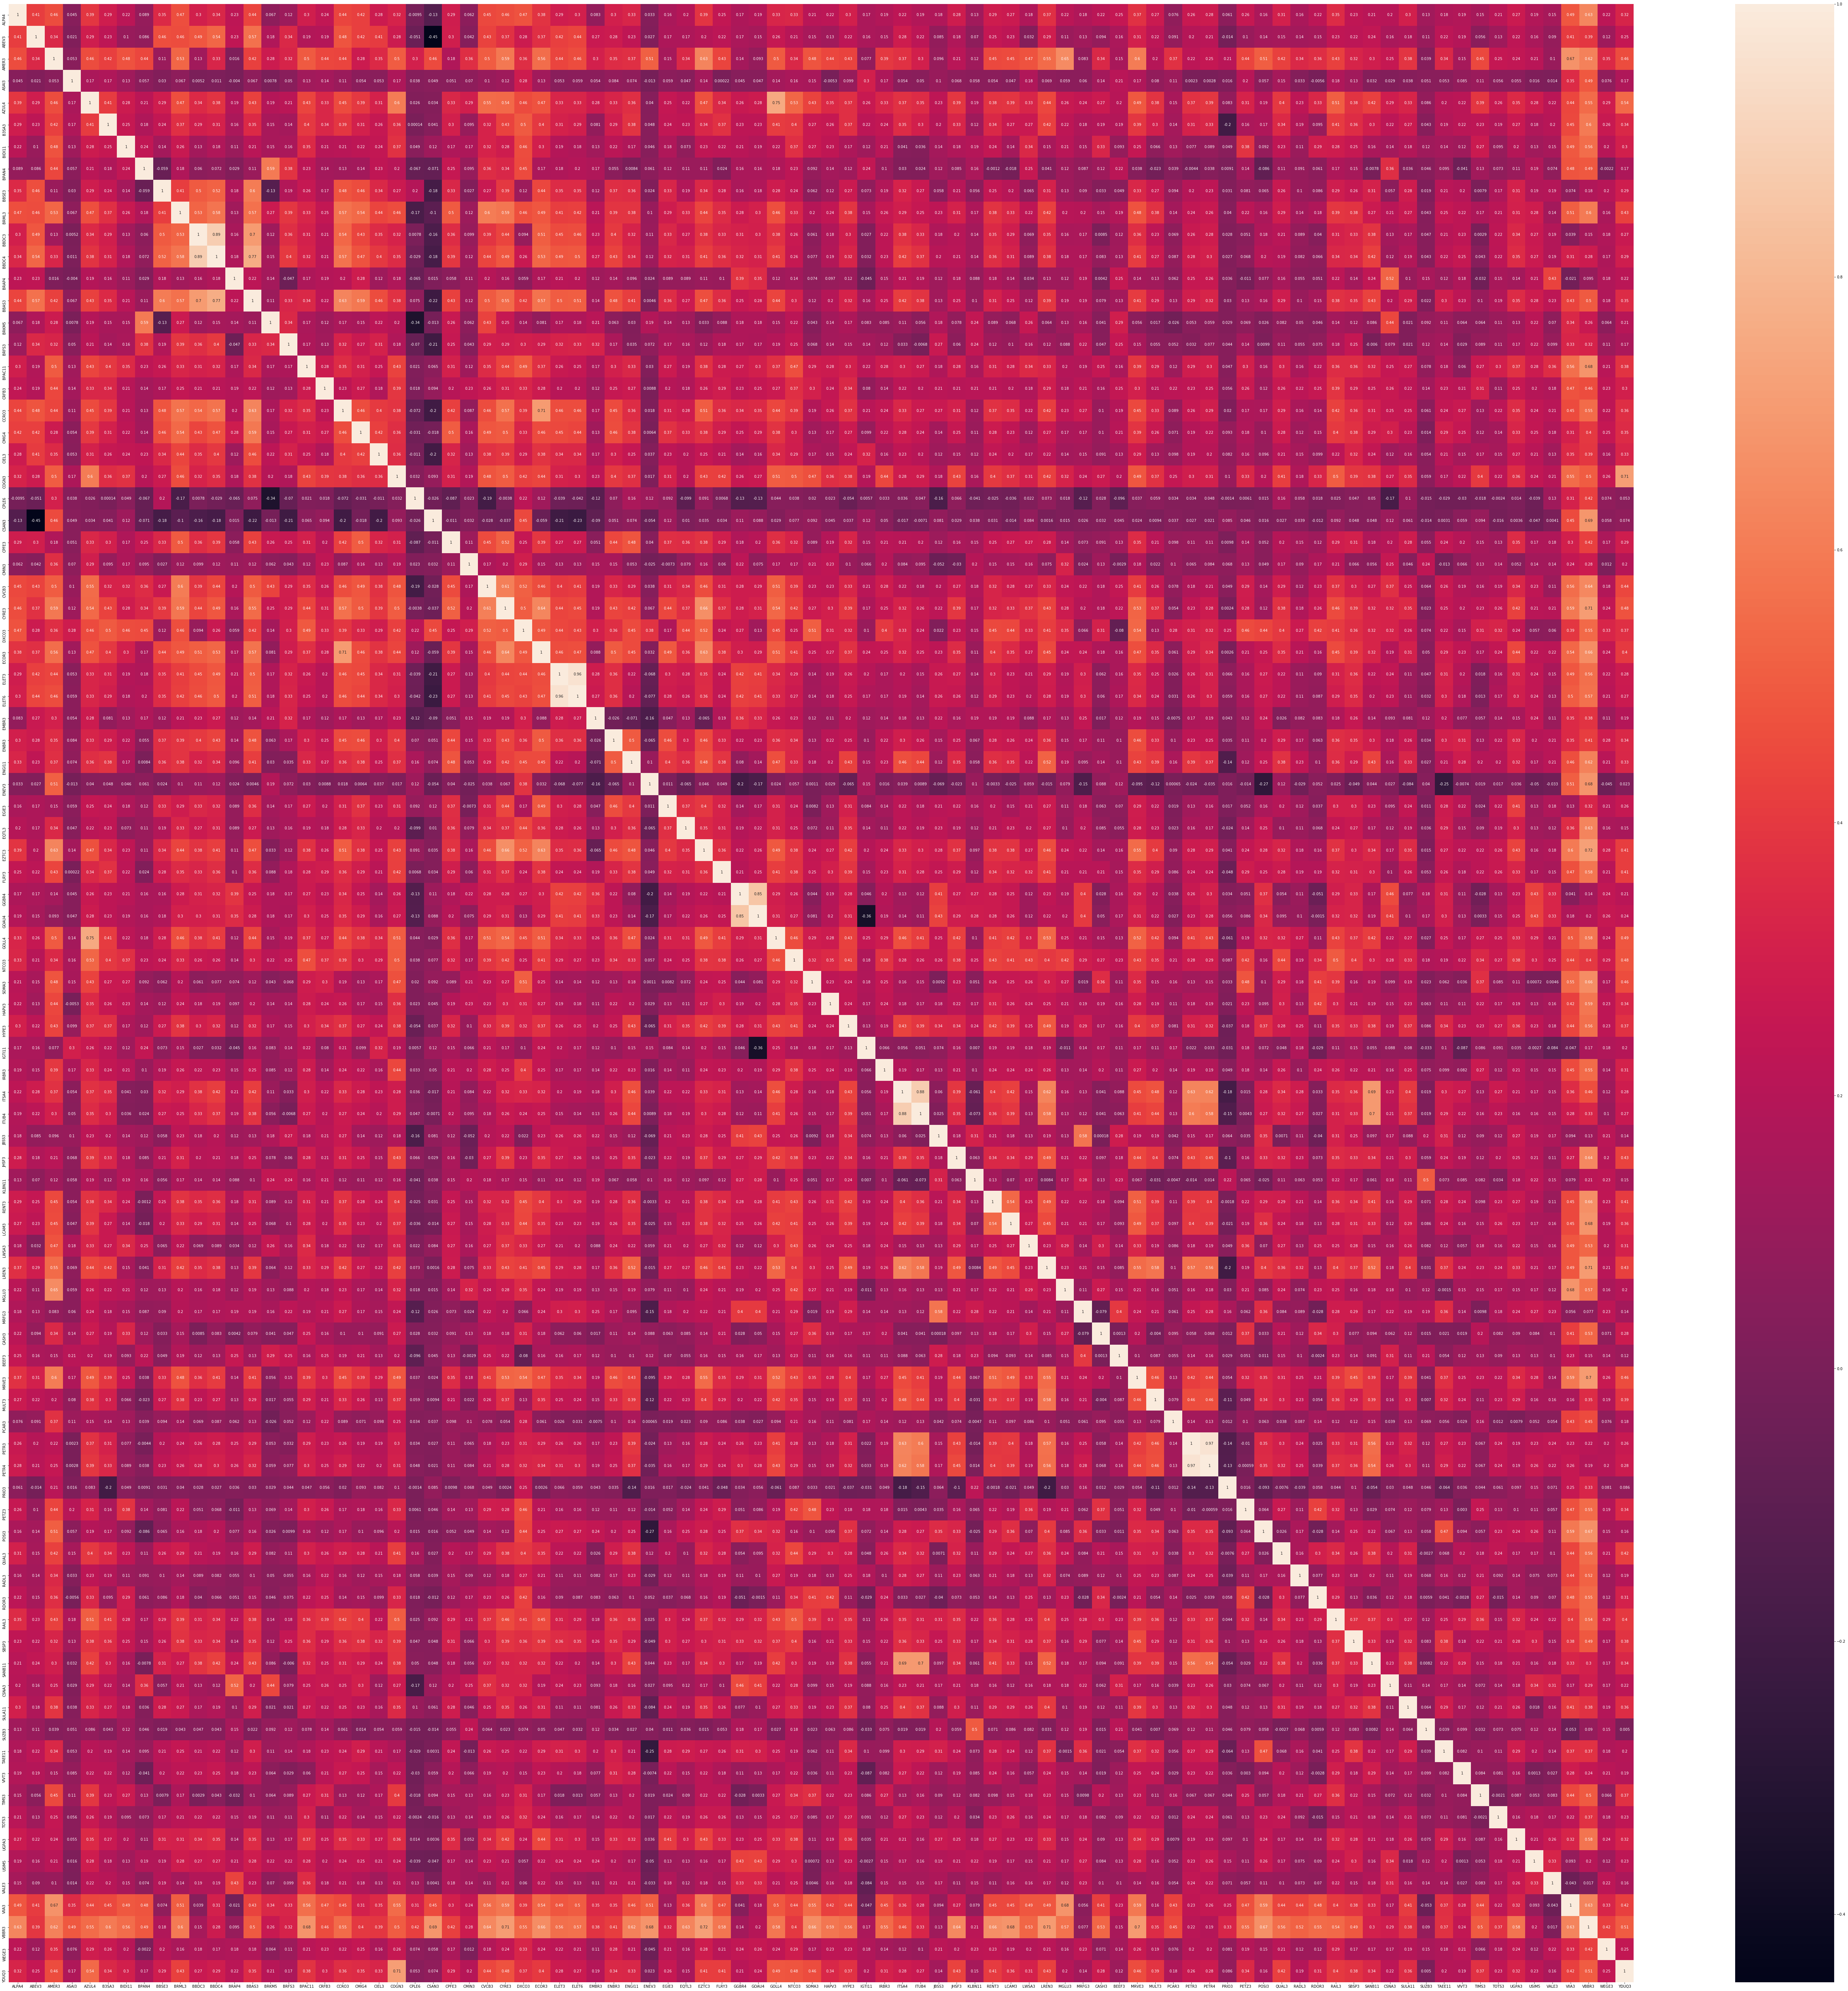

In [38]:
plt.figure(figsize=(100,100))

sns.heatmap(dfcovRetorno, annot = True)
plt.show()

### A quantidade de acções na carteira não permite fazer uma análise manual sobre que acções investir. Portanto é necessário usar alguma técnica de optimização da carteira.
### A técnica que será usada para optimizar a carteira é chamada de média-variância

## Carteira Markowitz (média-variância)

In [39]:
copyBase = baseDF.copy()
#copyBase = copyBase.set_index("Data")#(copyBase.columns[0])

days_analysis = 250

# calcular retornos diários e anuais
returns_daily = copyBase.pct_change()
returns_annual = returns_daily.mean() * days_analysis

# calcular covariância dos retornos diários e anuais
cov_daily = returns_daily.cov()
cov_annual = cov_daily * days_analysis



port_returns = []
port_volatility = []
sharpe_ratio = []
stock_weights = []

g_returns = []

num_stocks = len(tickers)
num_portfolios = 100000

# No Brasil seria o CDI, mas coloquei 0
risk_free_rate = 0


# Esta parte seria interessante caso tivesse uma restrição de Nº máximo de acções
N = len(tickers)
N_Max_Carteira = len(tickers) # N_Max_Carteira Ones, N-N_Max_Carteira Zeros
N_Min_Carteira = 10
N_fixoPortfolio = False

for single_portfolio in range(num_portfolios):
    
    if(N_fixoPortfolio == True):
        max_carteira = N_Max_Carteira
    else:
        max_carteira = np.random.randint(N_Min_Carteira, N_Max_Carteira)
    aux_arr = np.array([1] * max_carteira + [0] * (N-max_carteira))
    np.random.shuffle(aux_arr)
    weights = np.random.random(num_stocks)
    weights *= aux_arr
    weights /= np.sum(weights)
    returns = np.dot(weights, returns_annual)
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_annual, weights)))
    sharpe = (returns - risk_free_rate) / volatility
    sharpe_ratio.append(sharpe)
    port_returns.append(returns)
    port_volatility.append(volatility)
    stock_weights.append(weights)

    
portfolio = {'Retornos': port_returns,
             'Volatilidade': port_volatility,
             'Sharpe Ratio': sharpe_ratio}

for counter,symbol in enumerate(tickers):
    portfolio[symbol] = [Weight[counter] for Weight in stock_weights]

markowitzDF = pd.DataFrame(portfolio)

column_order = ['Retornos', 'Volatilidade', 'Sharpe Ratio'] + [stock for stock in tickers]

markowitzDF = markowitzDF[column_order]

In [40]:
## Colocando os dados da carteira escolhida
weights_portfolio_escolhido = np.zeros(len(tickers))
weights_portfolio_escolhido[36] = 0.080318
weights_portfolio_escolhido[57] = 0.074322
weights_portfolio_escolhido[85] = 0.072057
weights_portfolio_escolhido[0] = 0.068965
weights_portfolio_escolhido[81] = 0.061685
weights_portfolio_escolhido[74] = 0.061367
weights_portfolio_escolhido[68] = 0.060453
weights_portfolio_escolhido[7] = 0.053583
weights_portfolio_escolhido[32] = 0.051964
weights_portfolio_escolhido[43] = 0.051941
weights_portfolio_escolhido[86] = 0.042543
weights_portfolio_escolhido[45] = 0.042315
weights_portfolio_escolhido[23] = 0.038208
weights_portfolio_escolhido[18] = 0.033304
weights_portfolio_escolhido[88] = 0.028379
weights_portfolio_escolhido[10] = 0.028129
weights_portfolio_escolhido[70] = 0.028054
weights_portfolio_escolhido[1] = 0.026822
weights_portfolio_escolhido[83] = 0.016396
weights_portfolio_escolhido[25] = 0.015454
weights_portfolio_escolhido[80] = 0.014341
weights_portfolio_escolhido[54] = 0.013865
weights_portfolio_escolhido[37] = 0.013579
weights_portfolio_escolhido[16] = 0.013275
weights_portfolio_escolhido[41] = 0.007747
weights_portfolio_escolhido[67] = 0.000934

weights = weights_portfolio_escolhido.copy()
returns = np.dot(weights, returns_annual)
volatility = np.sqrt(np.dot(weights.T, np.dot(cov_annual, weights)))
sharpe = (returns - risk_free_rate) / volatility

returns_carteira_escolhida = returns
volatility_carteira_escolhida = volatility
sharpe_carteira_escolhida = sharpe

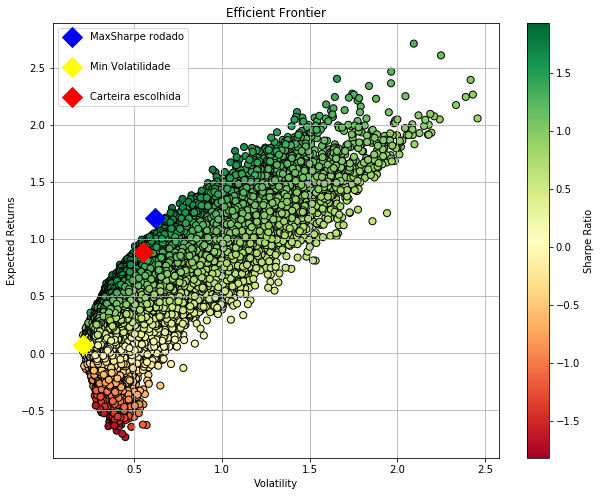

In [41]:

# min Volatilidade e max sharpe no df (markowitzDF)
min_volatility = markowitzDF['Volatilidade'].min()
max_sharpe = markowitzDF['Sharpe Ratio'].max()

# use the min, max values to locate and create the two special portfolios
sharpe_portfolio = markowitzDF.loc[markowitzDF['Sharpe Ratio'] == max_sharpe]
min_variance_port = markowitzDF.loc[markowitzDF['Volatilidade'] == min_volatility]

# Max sharpe e min volatilidade no plot

markowitzDF.plot.scatter(x='Volatilidade', y='Retornos', s= 50, c='Sharpe Ratio',
                cmap='RdYlGn', edgecolors='black', figsize=(10, 8), grid=True, sharex=False)

plt.scatter(x=sharpe_portfolio['Volatilidade'], y=sharpe_portfolio['Retornos'], c='blue', marker='D', s=200, label="MaxSharpe rodado")
plt.scatter(x=min_variance_port['Volatilidade'], y=min_variance_port['Retornos'], c='yellow', marker='D', s=200, label="Min Volatilidade" )
plt.scatter(x=volatility_carteira_escolhida, y=returns_carteira_escolhida, c='red', marker='D', s=200, label="Carteira escolhida" )
plt.xlabel('Volatility')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.legend(loc="upper left", labelspacing=2)
plt.show()

In [42]:
min_variance_portCopy = min_variance_port.copy()
min_variance_port.T[:3]

,2913270
Retornos,0.075605
Volatilidade,0.204428
Sharpe Ratio,0.369834


In [43]:
sharpe_portfolio.T[:3]
sharpe_portfolioCopy = sharpe_portfolio.copy()

In [44]:
min_variance_portCopy = min_variance_portCopy.drop(["Retornos", "Volatilidade", "Sharpe Ratio"], axis = 1)
pesos_min_variance = np.array(min_variance_portCopy)[0]

sharpe_portfolioCopy = sharpe_portfolioCopy.drop(["Retornos", "Volatilidade", "Sharpe Ratio"], axis = 1)
pesos_sharpeMax = np.array(sharpe_portfolioCopy)[0]

In [45]:
returns_sharpe = baseDF.copy()
returns_sharpe.index.names = ['Date']
returns_sharpe = returns_sharpe.sort_index(axis = 0)
returns_sharpe = returns_sharpe*pesos_sharpeMax
returns_sharpe['Sum Sharpe'] = returns_sharpe.iloc[:].sum(axis = 1)
returns_sharpe = returns_sharpe.pct_change()
returns_sharpe = returns_sharpe.filter(['Sum Sharpe'])


returns_escolhido = baseDF.copy()
returns_escolhido.index.names = ['Date']
returns_escolhido = returns_escolhido.sort_index(axis = 0)
returns_escolhido = returns_escolhido*weights_portfolio_escolhido
returns_escolhido['Sum escolhido'] = returns_escolhido.iloc[:].sum(axis = 1)
returns_escolhido = returns_escolhido.pct_change()
returns_escolhido = returns_escolhido.filter(['Sum escolhido'])


In [46]:
returns_sharpe = (1+returns_sharpe).cumprod()
returns_escolhido = (1+returns_escolhido).cumprod()

In [47]:
IBOVSumOriginal = yf.download("^BVSP", start="2017-01-02", end = "2022-05-04")

[*********************100%***********************]  1 of 1 completed


In [48]:
IBOVSum = IBOVSumOriginal.loc[:,['Close']]
IBOVSum = IBOVSum.sort_index(axis = 0)

In [49]:

IBOVSum = IBOVSum.pct_change()

IBOVSum = (1+IBOVSum).cumprod()

In [50]:
novo_df = pd.merge(IBOVSum, returns_sharpe, how = 'inner', on = 'Date')
novo_df.columns = ["IBOV", "MaxSharpe rodado"]

novo_df = pd.merge(novo_df, returns_escolhido, how = 'inner', on = 'Date')
novo_df.columns = ["IBOV", "MaxSharpe rodado", "Carteira escolhida"]


Text(0, 0.5, 'Retorno')

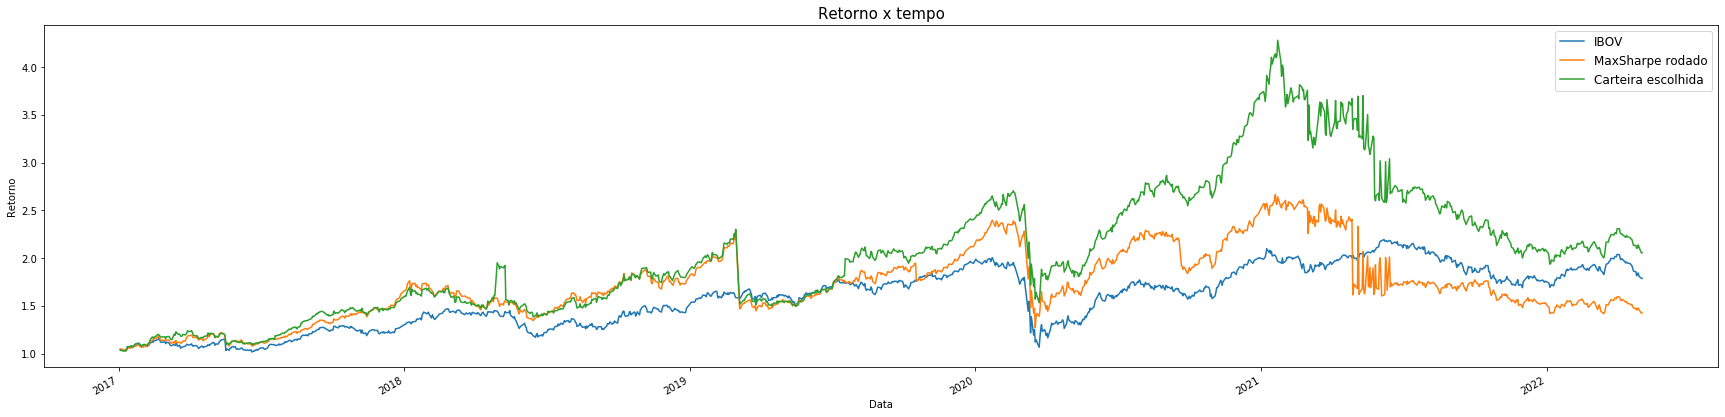

In [51]:
novo_df[["IBOV", "MaxSharpe rodado", "Carteira escolhida"]].plot(figsize=(30, 7))

plt.title("Retorno x tempo", fontsize = 15)
plt.legend(loc='upper right', fontsize=12)
plt.xlabel('Data')
plt.ylabel('Retorno')

#### No período de 2021 existem pontos no gráfico com subidas e descidas muito acentuadas, isso deve-se ao facto do ticker de muitas das acções que foram escolhidas não existirem na bolsa antes daquele período

## Composição e estatísticas do Portfolio escolhido

In [52]:
print("Sharpe da carteira escolhida", sharpe_carteira_escolhida)
print("Volatilidade da carteira escolhida", volatility_carteira_escolhida)

carteira_escolhida = pd.DataFrame(data=weights_portfolio_escolhido, index=tickers)
carteira_escolhida.sort_values(by=carteira_escolhida.columns[0], ascending = False)

Sharpe da carteira escolhida 1.6106394335718408
Volatilidade da carteira escolhida 0.5498518193941198


,0
ENEV3,0.080318
LWSA3,0.074322
USIM5,0.072057
RRRP3,0.068965
VIVT3,0.061685
...,...
IRBR3,0.000000
ITSA4,0.000000
BRAP4,0.000000
JBSS3,0.000000


## Porfolio com base no melhor sharpe da iteração

In [53]:
print("Sharpe da carteira com melhor sharpe na iteração", max_sharpe)
print("Volatilidade da carteira com melhor sharpe na iteração", sharpe_portfolio.iloc[0]['Volatilidade'])
topPortfolio = sharpe_portfolioCopy.T.sort_values(sharpe_portfolioCopy.T.columns[0], ascending = False)
topPortfolio

Sharpe da carteira com melhor sharpe na iteração 1.9281990276731322
Volatilidade da carteira com melhor sharpe na iteração 0.6164853571057652


,505217
LCAM3,0.098597
PETR4,0.095437
ALPA4,0.091026
PRIO3,0.090580
CSAN3,0.075473
...,...
ELET3,0.000000
ECOR3,0.000000
DXCO3,0.000000
CVCB3,0.000000


## Analise os resultados

### Traçando uma matriz de covariância dos retornos e o heatmap da carteira escolhida, podemos chegar à conclusão de que a carteira escolhida é descorrelacionada, o que é ideal num portfolio de investimento

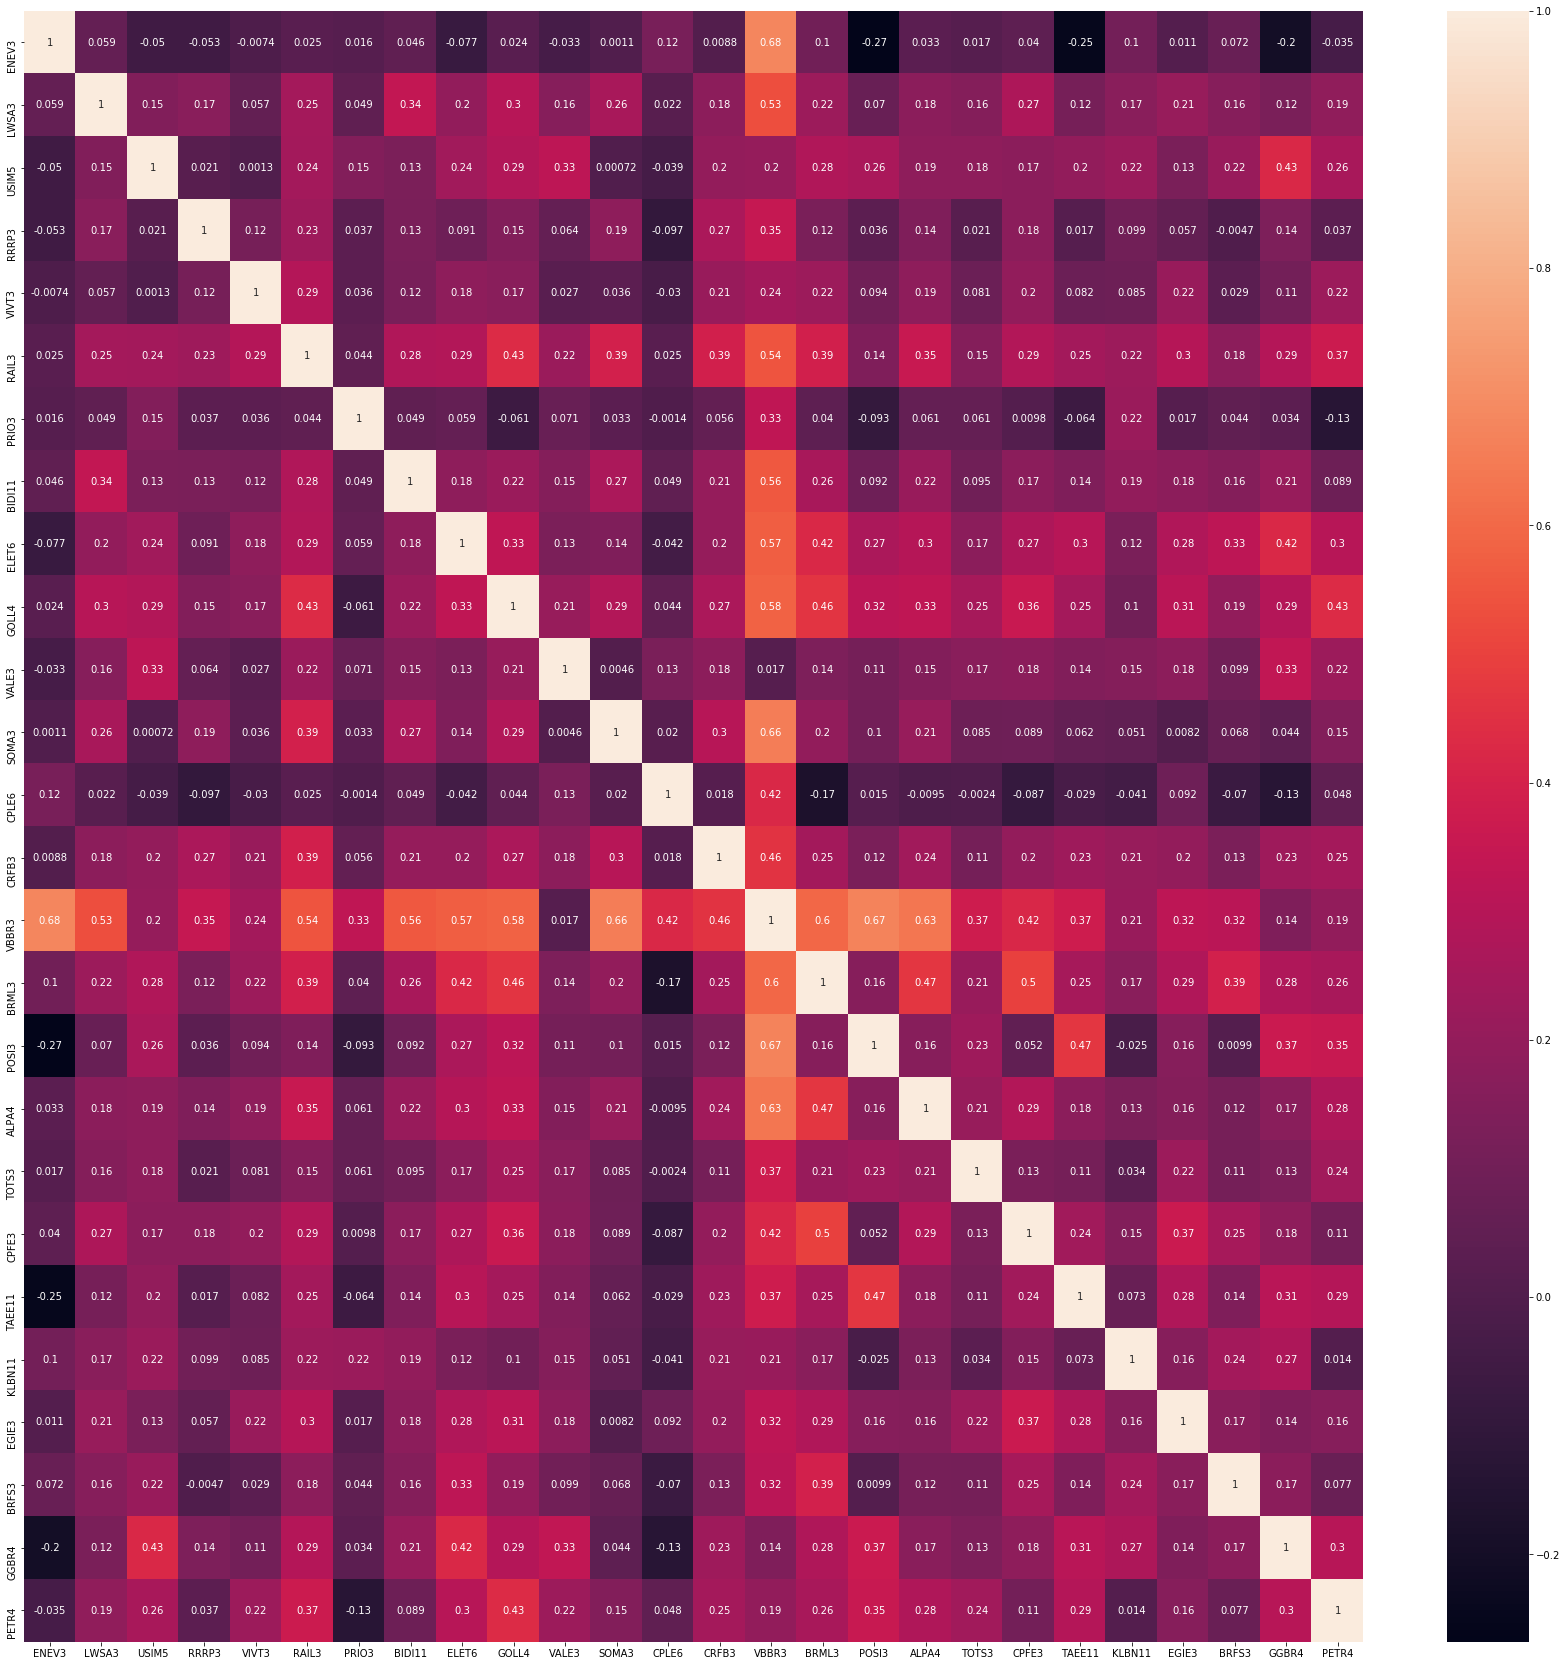

In [54]:
dfanalise = dfReturn.copy()
dfanalise = dfanalise.loc[:,["ENEV3", "LWSA3", "USIM5", "RRRP3", 
                           "VIVT3", "RAIL3", "PRIO3", "BIDI11",
                           "ELET6", "GOLL4", "VALE3", "SOMA3",
                           "CPLE6", "CRFB3", "VBBR3", "BRML3",
                           "POSI3", "ALPA4", "TOTS3", "CPFE3",
                           "TAEE11", "KLBN11", "EGIE3", "BRFS3",
                           "GGBR4", "PETR4"]]
dfanalise = dfanalise.corr()

plt.figure(figsize=(30,30))
sns.heatmap(dfanalise, annot = True)
plt.show()

### Podemos ver também que a expectativa de retornos é boa e superior ao IBOV (principal indicador no Brasil), com um sharpe ratio a rondar os 1.84 e um risco baixo, pois a volatilidade que ronda os 0.54

### O resultados obtidos foram a base de monte carlo, onde os vários resultados foram obtidos de forma aleatória. 
### Usando machine learning, seria possível obter melhores resultados de forma mais consistente após o treinamento do modelo

### É importante realçar que caso o pagamento de dividendos tivesse sido considerado, provavelmente a carteira seria diferente